# github link
https://github.com/NashraDocs/da6401_assignment1
# report link:
https://wandb.ai/ma23c024-iit-madras/A1_MA23C024/reports/Nashra-AmaanDA6401-Assignment-1--VmlldzoxMTgwMDkyMw

# Question1

wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: ma23c024 (ma23c024-iit-madras) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


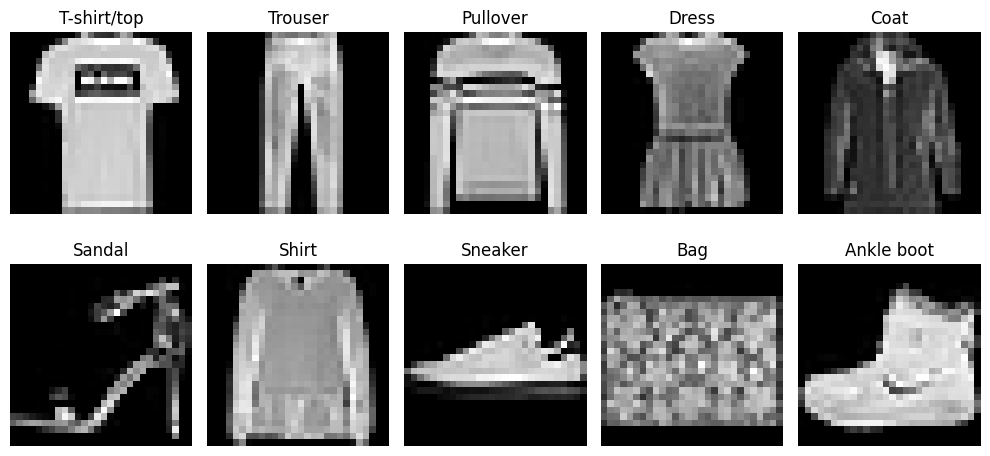

In [1]:
import argparse
import matplotlib.pyplot as plt
import wandb
from keras.datasets import fashion_mnist
import numpy as np

def main(wandb_entity, wandb_project):

    wandb.login()
    wandb.init(entity="ma23c024-iit-madras", project="A1_MA23C024", name="fashion-mnist-visualization")


    (x_train, y_train), (_, _) = fashion_mnist.load_data()

    Our_class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                       'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


    wandb_imgs = []
    for i in range(10):
        indexes = (y_train == i).nonzero()[0][0]
        imgs = x_train[indexes]
        wandb_imgs.append(wandb.Image(imgs, caption=Our_class_names[i]))

    wandb.log({"Fashion MNIST Samples": wandb_imgs})

    # Plot images locally
    plt.figure(figsize=(10, 5))
    for i in range(10):
        indexes = (y_train == i).nonzero()[0][0]
        plt.subplot(2, 5, i + 1)
        plt.imshow(x_train[indexes], cmap='gray')
        plt.title(Our_class_names[i])
        plt.axis('off')

    plt.tight_layout()
    plt.show()

    wandb.finish()

if __name__ == "__main__":
    import sys
    if "ipykernel" in sys.modules:
        main("Nashra", "A1_MA23C024")
    else:
        parser = argparse.ArgumentParser()
        parser.add_argument("--wandb_entity", type=str, required=True, help="ma23c024-iit-madras")
        parser.add_argument("--wandb_project", type=str, required=True, help="A1_MA23C024")
        args = parser.parse_args()
        main(args.wandb_entity, args.wandb_project)




# Question2

In [2]:
pip install wandb

In [3]:
pip install --upgrade wandb

In [4]:
from tensorflow import keras
import argparse
from wandb.integration.keras import WandbMetricsLogger
# from wandb.keras import WandbMetricsLogger
from tensorflow.keras import layers
import numpy as np


def model_builded(hidden_layers, neurons_per_layer):
    modl = keras.Sequential()
    modl.add(layers.Flatten(input_shape=(28, 28)))


    for _ in range(hidden_layers):
        modl.add(layers.Dense(neurons_per_layer, activation='relu'))

    modl.add(layers.Dense(10, activation='softmax'))

    modl.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return modl


def main(wandb_entity, wandb_project, hidden_layers, neurons_per_layer, epochs, batch_size):
    wandb.login()
    wandb.init(entity="ma23c024-iit-madras", project="A1_MA23C024", config={
        "hidden_layers": hidden_layers,
        "neurons_per_layer": neurons_per_layer,
        "epochs": epochs,
        "batch_size": batch_size
    })


    (x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()
    x_train, x_test = x_train / 255.0, x_test / 255.0


    modl = model_builded(hidden_layers, neurons_per_layer)


    history = modl.fit(
    x_train, y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(x_test, y_test),
    callbacks=[WandbMetricsLogger()]
)



    test_loss, test_acc = modl.evaluate(x_test, y_test, verbose=2)
    wandb.log({"Test Accuracy": test_acc})

if __name__ == "__main__":
    if "get_ipython" in globals():
        wandb_entity = "ma23c024-iit-madras"
        wandb_project = "A1_MA23C024"
        hidden_layers = 2
        neurons_per_layer = 128
        epochs = 10
        batch_size = 32
        main(wandb_entity, wandb_project, hidden_layers, neurons_per_layer, epochs, batch_size)
    else:
        parser = argparse.ArgumentParser()
        parser.add_argument("--wandb_entity", type=str, required=True, help="WandB entity name")
        parser.add_argument("--wandb_project", type=str, required=True, help="WandB project name")
        parser.add_argument("--hidden_layers", type=int, default=2, help="Number of hidden layers")
        parser.add_argument("--neurons_per_layer", type=int, default=128, help="Neurons per hidden layer")
        parser.add_argument("--epochs", type=int, default=10, help="Number of training epochs")
        parser.add_argument("--batch_size", type=int, default=32, help="Batch size for training")

        args = parser.parse_args()
        main(args.wandb_entity, args.wandb_project, args.hidden_layers, args.neurons_per_layer, args.epochs, args.batch_size)



/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7759 - loss: 0.6294 - val_accuracy: 0.8468 - val_loss: 0.4362
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.8656 - loss: 0.3723 - val_accuracy: 0.8504 - val_loss: 0.4018
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.8799 - loss: 0.3271 - val_accuracy: 0.8623 - val_loss: 0.3827
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 6ms/step - accuracy: 0.8852 - loss: 0.3111 - val_accuracy: 0.8702 - val_loss: 0.3731
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - accuracy: 0.8946 - loss: 0.2876 - val_accuracy: 0.8685 - val_loss: 0.3695
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8952 - loss: 0.2800 - val_accuracy: 0.8811 - val_loss: 0.3407
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9025 - loss: 0.2600 - val_accuracy: 0.8799 - val_loss: 0.3432
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9045 - loss: 

Question3

In [15]:
import numpy as np
import wandb
from torch.utils.data import DataLoader, TensorDataset
import torch
X = np.random.rand(1000, 2)
y = (X[:, 0] + X[:, 1] > 1).astype(int)


X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32)

dataset = TensorDataset(X_tensor, y_tensor)

train_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

class NeuralNetwork:
    def __init__(self, input_size, hidden_layers, output_size, optimizer='sgd', learning_rate=0.01):
        self.layers = [input_size] + hidden_layers + [output_size]
        self.weights = [np.random.randn(self.layers[i], self.layers[i+1]) * 0.1 for i in range(len(self.layers) - 1)]
        self.biases = [np.zeros((1, self.layers[i+1])) for i in range(len(self.layers) - 1)]
        self.optimizer = optimizer
        self.learning_rate = learning_rate
        self.velocities = [np.zeros_like(w) for w in self.weights]
        self.squares = [np.zeros_like(w) for w in self.weights]
        self.moment1 = [np.zeros_like(w) for w in self.weights]
        self.moment2 = [np.zeros_like(w) for w in self.weights]
        self.t = 1
        self.momentum = 0.9
        self.beta1, self.beta2, self.epsilon = 0.9, 0.999, 1e-8

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def forward(self, X):
        self.activations = [X]
        self.z_values = []

        for i in range(len(self.weights)):
            z = np.dot(self.activations[-1], self.weights[i]) + self.biases[i]
            self.z_values.append(z)
            self.activations.append(self.sigmoid(z))

        return self.activations[-1]

    def compute_gradients(self, X, y):
        m = X.shape[0]
        output_error = self.activations[-1] - y
        gradients_w, gradients_b = [], []

        delta = output_error * self.sigmoid_derivative(self.activations[-1])
        for i in reversed(range(len(self.weights))):
            grad_w = np.dot(self.activations[i].T, delta) / m
            grad_b = np.sum(delta, axis=0, keepdims=True) / m
            gradients_w.insert(0, grad_w)
            gradients_b.insert(0, grad_b)
            if i != 0:
                delta = np.dot(delta, self.weights[i].T) * self.sigmoid_derivative(self.activations[i])

        return gradients_w, gradients_b

    def update_weights(self, gradients_w, gradients_b):
        for i in range(len(self.weights)):
            if self.optimizer == 'sgd':
                self.weights[i] -= self.learning_rate * gradients_w[i]
                self.biases[i] -= self.learning_rate * gradients_b[i]

            elif self.optimizer == 'momentum':
                self.velocities[i] = self.momentum * self.velocities[i] - self.learning_rate * gradients_w[i]
                self.weights[i] += self.velocities[i]
                self.biases[i] -= self.learning_rate * gradients_b[i]

            elif self.optimizer == 'nesterov':
                prev_velocity = self.velocities[i]
                self.velocities[i] = self.momentum * self.velocities[i] - self.learning_rate * gradients_w[i]
                self.weights[i] += -self.momentum * prev_velocity + (1 + self.momentum) * self.velocities[i]
                self.biases[i] -= self.learning_rate * gradients_b[i]

            elif self.optimizer == 'rmsprop':
                self.squares[i] = self.beta1 * self.squares[i] + (1 - self.beta1) * gradients_w[i]**2
                self.weights[i] -= self.learning_rate * gradients_w[i] / (np.sqrt(self.squares[i]) + self.epsilon)
                self.biases[i] -= self.learning_rate * gradients_b[i]

            elif self.optimizer == 'adam':
                self.moment1[i] = self.beta1 * self.moment1[i] + (1 - self.beta1) * gradients_w[i]
                self.moment2[i] = self.beta2 * self.moment2[i] + (1 - self.beta2) * (gradients_w[i] ** 2)
                m_hat = self.moment1[i] / (1 - self.beta1**self.t)
                v_hat = self.moment2[i] / (1 - self.beta2**self.t)
                self.weights[i] -= self.learning_rate * m_hat / (np.sqrt(v_hat) + self.epsilon)
                self.biases[i] -= self.learning_rate * gradients_b[i]

            elif self.optimizer == 'nadam':
                m_hat = (self.beta1 * self.moment1[i] + (1 - self.beta1) * gradients_w[i]) / (1 - self.beta1**self.t)
                v_hat = self.moment2[i] / (1 - self.beta2**self.t)
                self.weights[i] -= self.learning_rate * m_hat / (np.sqrt(v_hat) + self.epsilon)
                self.biases[i] -= self.learning_rate * gradients_b[i]
        self.t += 1

    def train(self, X, y, epochs=100, batch_size=32):
        wandb.init(project="A1_MA23C024", reinit=True)
        wandb.config.update({"learning_rate": self.learning_rate, "optimizer": self.optimizer, "batch_size": batch_size})

        for epoch in range(epochs):
            correct_predictions = 0
            total_samples = 0
            for i in range(0, len(X), batch_size):
                X_batch = X[i:i+batch_size]
                y_batch = y[i:i+batch_size]
                self.forward(X_batch)
                gradients_w, gradients_b = self.compute_gradients(X_batch, y_batch)
                self.update_weights(gradients_w, gradients_b)
                y_pred_batch = self.forward(X_batch)
                correct_predictions += np.sum((y_pred_batch > 0.5) == y_batch)
                total_samples += len(y_batch)


            y_pred = self.forward(X)
            loss = np.mean((y_pred - y) ** 2)
            accuracy = correct_predictions / total_samples

            scatter_data = [[X[i, 0], X[i, 1], y[i]] for i in range(len(X))]
            table = wandb.Table(data=scatter_data, columns=["X1", "X2", "Label"])
            wandb.log({"Scatter Plot": table})


            wandb.log({"epoch": epoch, "loss": loss, "accuracy": accuracy})


            if epoch % 10 == 0:
                print(f"Epoch {epoch}: Loss = {loss:.4f}")

    def predict(self, X):
        return self.forward(X)


if __name__ == "__main__":
    np.random.seed(42)

    X_train = np.random.rand(1000, 2)
    y_train = (X_train[:, 0] + X_train[:, 1] > 1).astype(int).reshape(-1, 1)

    batch_sizes = [8, 16, 32, 64]
    optimizers = ["sgd", "momentum", "nesterov", "rmsprop", "adam", "nadam"]

    for batch_size in batch_sizes:
        for opt in optimizers:
            print(f"\nTraining with batch size {batch_size} and optimizer {opt}...\n")
            model = NeuralNetwork(input_size=2, hidden_layers=[4, 4], output_size=1, optimizer=opt, learning_rate=0.01)
            model.train(X_train, y_train, epochs=50, batch_size=batch_size)





Training with batch size 8 and optimizer sgd...



accuracy,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇▇███
loss,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
accuracy,0.496
epoch,49
loss,0.504


wandb: WARNING Config item 'learning_rate' was locked by 'sweep' (ignored update).
wandb: WARNING Config item 'optimizer' was locked by 'sweep' (ignored update).
wandb: WARNING Config item 'batch_size' was locked by 'sweep' (ignored update).


Epoch 0: Loss = 0.2506
Epoch 10: Loss = 0.2500
Epoch 20: Loss = 0.2500
Epoch 30: Loss = 0.2500
Epoch 40: Loss = 0.2500

Training with batch size 8 and optimizer momentum...



accuracy,▁▁▁▁▁▁▁▁▁▂█▄▇▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄
epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇▇███
loss,█▆▅▄▃▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
accuracy,0.504
epoch,49
loss,0.24997


wandb: WARNING Config item 'learning_rate' was locked by 'sweep' (ignored update).
wandb: WARNING Config item 'optimizer' was locked by 'sweep' (ignored update).
wandb: WARNING Config item 'batch_size' was locked by 'sweep' (ignored update).


Epoch 0: Loss = 0.2500
Epoch 10: Loss = 0.2500
Epoch 20: Loss = 0.2500
Epoch 30: Loss = 0.2500
Epoch 40: Loss = 0.2500

Training with batch size 8 and optimizer nesterov...



accuracy,█▄▃▄▃▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇▇███
loss,▄▆█████▇▇▇▇▇▆▆▆▆▅▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▂▂▂▂▂▂▁▁
accuracy,0.487
epoch,49
loss,0.25


wandb: WARNING Config item 'learning_rate' was locked by 'sweep' (ignored update).
wandb: WARNING Config item 'optimizer' was locked by 'sweep' (ignored update).
wandb: WARNING Config item 'batch_size' was locked by 'sweep' (ignored update).


Epoch 0: Loss = 0.2500
Epoch 10: Loss = 0.2500
Epoch 20: Loss = 0.2500
Epoch 30: Loss = 0.2500
Epoch 40: Loss = 0.2500

Training with batch size 8 and optimizer rmsprop...



accuracy,█▂█▅▃▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇▇███
loss,▁▆▇█████████████████████▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇
accuracy,0.49
epoch,49
loss,0.25001


wandb: WARNING Config item 'learning_rate' was locked by 'sweep' (ignored update).
wandb: WARNING Config item 'optimizer' was locked by 'sweep' (ignored update).
wandb: WARNING Config item 'batch_size' was locked by 'sweep' (ignored update).


Epoch 0: Loss = 0.2493
Epoch 10: Loss = 0.0375
Epoch 20: Loss = 0.0221
Epoch 30: Loss = 0.0171
Epoch 40: Loss = 0.0143

Training with batch size 8 and optimizer adam...



accuracy,▁▅▇▇▇███████████████████████████████████
epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇▇███
loss,██▇▅▄▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
accuracy,0.998
epoch,49
loss,0.01273


wandb: WARNING Config item 'learning_rate' was locked by 'sweep' (ignored update).
wandb: WARNING Config item 'optimizer' was locked by 'sweep' (ignored update).
wandb: WARNING Config item 'batch_size' was locked by 'sweep' (ignored update).


Epoch 0: Loss = 0.2491
Epoch 10: Loss = 0.0342
Epoch 20: Loss = 0.0234
Epoch 30: Loss = 0.0191
Epoch 40: Loss = 0.0168

Training with batch size 8 and optimizer nadam...



accuracy,▁▂▆▇████████████████████████████████████
epoch,▁▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
loss,█▇▄▃▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
accuracy,0.991
epoch,49
loss,0.01542


wandb: WARNING Config item 'learning_rate' was locked by 'sweep' (ignored update).
wandb: WARNING Config item 'optimizer' was locked by 'sweep' (ignored update).
wandb: WARNING Config item 'batch_size' was locked by 'sweep' (ignored update).
<ipython-input-15-f53ff05aa9f5>:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


Epoch 0: Loss = 0.5040
Epoch 10: Loss = 0.5040
Epoch 20: Loss = 0.5040
Epoch 30: Loss = 0.5040
Epoch 40: Loss = 0.5040

Training with batch size 16 and optimizer sgd...



accuracy,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch,▁▁▁▁▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇▇███
loss,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
accuracy,0.496
epoch,49
loss,0.504


wandb: WARNING Config item 'learning_rate' was locked by 'sweep' (ignored update).
wandb: WARNING Config item 'optimizer' was locked by 'sweep' (ignored update).
wandb: WARNING Config item 'batch_size' was locked by 'sweep' (ignored update).


Epoch 0: Loss = 0.2500
Epoch 10: Loss = 0.2500
Epoch 20: Loss = 0.2500
Epoch 30: Loss = 0.2500
Epoch 40: Loss = 0.2500

Training with batch size 16 and optimizer momentum...



accuracy,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch,▁▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇▇███
loss,█▆▆▅▄▄▃▃▃▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
accuracy,0.504
epoch,49
loss,0.24998


wandb: WARNING Config item 'learning_rate' was locked by 'sweep' (ignored update).
wandb: WARNING Config item 'optimizer' was locked by 'sweep' (ignored update).
wandb: WARNING Config item 'batch_size' was locked by 'sweep' (ignored update).


Epoch 0: Loss = 0.2506
Epoch 10: Loss = 0.2500
Epoch 20: Loss = 0.2500
Epoch 30: Loss = 0.2500
Epoch 40: Loss = 0.2500

Training with batch size 16 and optimizer nesterov...



accuracy,▆▆▆▆▁▅██████████████████████████████████
epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
loss,█▃▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
accuracy,0.504
epoch,49
loss,0.24998


wandb: WARNING Config item 'learning_rate' was locked by 'sweep' (ignored update).
wandb: WARNING Config item 'optimizer' was locked by 'sweep' (ignored update).
wandb: WARNING Config item 'batch_size' was locked by 'sweep' (ignored update).


Epoch 0: Loss = 0.2500
Epoch 10: Loss = 0.2500
Epoch 20: Loss = 0.2500
Epoch 30: Loss = 0.2500
Epoch 40: Loss = 0.2500

Training with batch size 16 and optimizer rmsprop...



accuracy,▄▆▆▁▅███████████████████████████████████
epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
loss,█▃▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
accuracy,0.504
epoch,49
loss,0.24999


wandb: WARNING Config item 'learning_rate' was locked by 'sweep' (ignored update).
wandb: WARNING Config item 'optimizer' was locked by 'sweep' (ignored update).
wandb: WARNING Config item 'batch_size' was locked by 'sweep' (ignored update).


Epoch 0: Loss = 0.2498
Epoch 10: Loss = 0.0514
Epoch 20: Loss = 0.0275
Epoch 30: Loss = 0.0207
Epoch 40: Loss = 0.0173

Training with batch size 16 and optimizer adam...



accuracy,▁▁▄▇▇▇██████████████████████████████████
epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇▇██
loss,██▇▆▅▃▃▃▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
accuracy,0.997
epoch,49
loss,0.01532


wandb: WARNING Config item 'learning_rate' was locked by 'sweep' (ignored update).
wandb: WARNING Config item 'optimizer' was locked by 'sweep' (ignored update).
wandb: WARNING Config item 'batch_size' was locked by 'sweep' (ignored update).


Epoch 0: Loss = 0.2499
Epoch 10: Loss = 0.0595
Epoch 20: Loss = 0.0331
Epoch 30: Loss = 0.0247
Epoch 40: Loss = 0.0202

Training with batch size 16 and optimizer nadam...



accuracy,▁▁▃▆▇▇██████████████████████████████████
epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇▇███
loss,███▇▅▄▃▃▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
accuracy,0.993
epoch,49
loss,0.01762


wandb: WARNING Config item 'learning_rate' was locked by 'sweep' (ignored update).
wandb: WARNING Config item 'optimizer' was locked by 'sweep' (ignored update).
wandb: WARNING Config item 'batch_size' was locked by 'sweep' (ignored update).


Epoch 0: Loss = 0.5040
Epoch 10: Loss = 0.5040
Epoch 20: Loss = 0.5040
Epoch 30: Loss = 0.5040
Epoch 40: Loss = 0.5040

Training with batch size 32 and optimizer sgd...



accuracy,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch,▁▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▇▇▇▇▇▇███
loss,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
accuracy,0.496
epoch,49
loss,0.504


wandb: WARNING Config item 'learning_rate' was locked by 'sweep' (ignored update).
wandb: WARNING Config item 'optimizer' was locked by 'sweep' (ignored update).
wandb: WARNING Config item 'batch_size' was locked by 'sweep' (ignored update).


Epoch 0: Loss = 0.2503
Epoch 10: Loss = 0.2501
Epoch 20: Loss = 0.2500
Epoch 30: Loss = 0.2500
Epoch 40: Loss = 0.2500

Training with batch size 32 and optimizer momentum...



accuracy,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▂██▆▇▃▃▃▃▃
epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
loss,█▇▇▆▆▅▅▄▄▄▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
accuracy,0.504
epoch,49
loss,0.24998


wandb: WARNING Config item 'learning_rate' was locked by 'sweep' (ignored update).
wandb: WARNING Config item 'optimizer' was locked by 'sweep' (ignored update).
wandb: WARNING Config item 'batch_size' was locked by 'sweep' (ignored update).


Epoch 0: Loss = 0.2500
Epoch 10: Loss = 0.2500
Epoch 20: Loss = 0.2500
Epoch 30: Loss = 0.2500
Epoch 40: Loss = 0.2500

Training with batch size 32 and optimizer nesterov...



accuracy,▆▆█▁████████████████████████████████████
epoch,▁▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇▇███
loss,█▅▄▃▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
accuracy,0.504
epoch,49
loss,0.24999


wandb: WARNING Config item 'learning_rate' was locked by 'sweep' (ignored update).
wandb: WARNING Config item 'optimizer' was locked by 'sweep' (ignored update).
wandb: WARNING Config item 'batch_size' was locked by 'sweep' (ignored update).


Epoch 0: Loss = 0.2504
Epoch 10: Loss = 0.2500
Epoch 20: Loss = 0.2500
Epoch 30: Loss = 0.2500
Epoch 40: Loss = 0.2500

Training with batch size 32 and optimizer rmsprop...



accuracy,▂▂▂▂▂▁█▁▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆
epoch,▁▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
loss,█▅▄▃▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
accuracy,0.504
epoch,49
loss,0.25


wandb: WARNING Config item 'learning_rate' was locked by 'sweep' (ignored update).
wandb: WARNING Config item 'optimizer' was locked by 'sweep' (ignored update).
wandb: WARNING Config item 'batch_size' was locked by 'sweep' (ignored update).


Epoch 0: Loss = 0.2500
Epoch 10: Loss = 0.1284
Epoch 20: Loss = 0.0502
Epoch 30: Loss = 0.0338
Epoch 40: Loss = 0.0269

Training with batch size 32 and optimizer adam...



accuracy,▁▁▁▂▅▆▇▇▇▇▇▇████████████████████████████
epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇▇███
loss,████▇▆▅▅▄▄▃▃▃▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
accuracy,0.998
epoch,49
loss,0.02335


wandb: WARNING Config item 'learning_rate' was locked by 'sweep' (ignored update).
wandb: WARNING Config item 'optimizer' was locked by 'sweep' (ignored update).
wandb: WARNING Config item 'batch_size' was locked by 'sweep' (ignored update).


Epoch 0: Loss = 0.2496
Epoch 10: Loss = 0.0861
Epoch 20: Loss = 0.0428
Epoch 30: Loss = 0.0307
Epoch 40: Loss = 0.0248

Training with batch size 32 and optimizer nadam...



accuracy,▁▂▂▃▄▆▇▇▇███████████████████████████████
epoch,▁▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
loss,████▇▅▄▄▃▃▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
accuracy,0.992
epoch,49
loss,0.02145


wandb: WARNING Config item 'learning_rate' was locked by 'sweep' (ignored update).
wandb: WARNING Config item 'optimizer' was locked by 'sweep' (ignored update).
wandb: WARNING Config item 'batch_size' was locked by 'sweep' (ignored update).


Epoch 0: Loss = 0.5040
Epoch 10: Loss = 0.5040
Epoch 20: Loss = 0.5040
Epoch 30: Loss = 0.5040
Epoch 40: Loss = 0.5040

Training with batch size 64 and optimizer sgd...



accuracy,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇▇███
loss,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
accuracy,0.496
epoch,49
loss,0.504


wandb: WARNING Config item 'learning_rate' was locked by 'sweep' (ignored update).
wandb: WARNING Config item 'optimizer' was locked by 'sweep' (ignored update).
wandb: WARNING Config item 'batch_size' was locked by 'sweep' (ignored update).


Epoch 0: Loss = 0.2517
Epoch 10: Loss = 0.2511
Epoch 20: Loss = 0.2507
Epoch 30: Loss = 0.2505
Epoch 40: Loss = 0.2503

Training with batch size 64 and optimizer momentum...



accuracy,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇▇███
loss,██▇▇▇▆▆▆▆▅▅▅▅▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁
accuracy,0.496
epoch,49
loss,0.25023


wandb: WARNING Config item 'learning_rate' was locked by 'sweep' (ignored update).
wandb: WARNING Config item 'optimizer' was locked by 'sweep' (ignored update).
wandb: WARNING Config item 'batch_size' was locked by 'sweep' (ignored update).


Epoch 0: Loss = 0.2501
Epoch 10: Loss = 0.2500
Epoch 20: Loss = 0.2500
Epoch 30: Loss = 0.2500
Epoch 40: Loss = 0.2500

Training with batch size 64 and optimizer nesterov...



accuracy,▁▁▁▁▁▁▁▁█▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆
epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
loss,█▇▅▄▃▃▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
accuracy,0.504
epoch,49
loss,0.24998


wandb: WARNING Config item 'learning_rate' was locked by 'sweep' (ignored update).
wandb: WARNING Config item 'optimizer' was locked by 'sweep' (ignored update).
wandb: WARNING Config item 'batch_size' was locked by 'sweep' (ignored update).


Epoch 0: Loss = 0.2502
Epoch 10: Loss = 0.2500
Epoch 20: Loss = 0.2500
Epoch 30: Loss = 0.2500
Epoch 40: Loss = 0.2500

Training with batch size 64 and optimizer rmsprop...



accuracy,▅▅▅▅▅▅▅▅▅▅█▁▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇▇███
loss,█▇▆▅▄▃▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
accuracy,0.504
epoch,49
loss,0.25


wandb: WARNING Config item 'learning_rate' was locked by 'sweep' (ignored update).
wandb: WARNING Config item 'optimizer' was locked by 'sweep' (ignored update).
wandb: WARNING Config item 'batch_size' was locked by 'sweep' (ignored update).


Epoch 0: Loss = 0.2498
Epoch 10: Loss = 0.1953
Epoch 20: Loss = 0.0977
Epoch 30: Loss = 0.0558
Epoch 40: Loss = 0.0389

Training with batch size 64 and optimizer adam...



accuracy,▁▂▂▄▄▅▅▆▇▇██████████████████████████████
epoch,▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇▇███
loss,█████▇▇▇▆▆▅▅▄▄▄▃▃▃▃▃▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁
accuracy,0.996
epoch,49
loss,0.03123


wandb: WARNING Config item 'learning_rate' was locked by 'sweep' (ignored update).
wandb: WARNING Config item 'optimizer' was locked by 'sweep' (ignored update).
wandb: WARNING Config item 'batch_size' was locked by 'sweep' (ignored update).


Epoch 0: Loss = 0.2500
Epoch 10: Loss = 0.1897
Epoch 20: Loss = 0.1049
Epoch 30: Loss = 0.0735
Epoch 40: Loss = 0.0580

Training with batch size 64 and optimizer nadam...



accuracy,▁▁▁▄▆███████████████████████████████████
epoch,▁▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇███
loss,█████▇▇▆▆▅▅▄▄▄▄▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁
accuracy,0.988
epoch,49
loss,0.04946


wandb: WARNING Config item 'learning_rate' was locked by 'sweep' (ignored update).
wandb: WARNING Config item 'optimizer' was locked by 'sweep' (ignored update).
wandb: WARNING Config item 'batch_size' was locked by 'sweep' (ignored update).


Epoch 0: Loss = 0.5040
Epoch 10: Loss = 0.5040
Epoch 20: Loss = 0.5040
Epoch 30: Loss = 0.5040
Epoch 40: Loss = 0.5040


# This code is just to try new experiment
i tried the another way to using table method

In [16]:
import wandb
import random
import time


wandb.init(project="A1_M23C024")


table = wandb.Table(columns=["X", "Y"])


for step in range(100):
    x_value = step
    y_value = random.uniform(0, 10)
    table.add_data(x_value, y_value)
    time.sleep(0.1)


wandb.log({"scatter_plot": wandb.plot.scatter(table, "X", "Y", title="Accuracy vs Created")})


In [6]:
pip install --upgrade wandb keras


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 14.3 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 3.8.0
    Uninstalling keras-3.8.0:
      Successfully uninstalled keras-3.8.0


In [ ]:
pip install keras==2.9.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 20.5 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 3.9.0
    Uninstalling keras-3.9.0:
      Successfully uninstalled keras-3.9.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.18.0 requires keras>=3.5.0, but you have keras 2.9.0 which is incompatible.


# Question4

In [1]:
import wandb
wandb.login()


wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: ma23c024 (ma23c024-iit-madras) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


True

# This was just to increase the count of scatter plot by different method this is just an experiment which i have done

In [1]:
import wandb
import random

def train(config=None):
    with wandb.init(config=config):
        config = wandb.config
        print(f"Training with hidden_layers={config.hidden_layers}, layer_1_size={config.layer_1_size}, layer_2_size={config.layer_2_size}")


        table = wandb.Table(columns=["Epoch", "Accuracy"])

        for epoch in range(config.epochs):
            val_accuracy = random.uniform(0.5, 1.0)


            table.add_data(epoch, val_accuracy)


            wandb.log({
                "epoch": epoch,
                "val_accuracy": val_accuracy,
                "scatter_plot": wandb.plot.scatter(table, "Epoch", "Accuracy", title="Epoch vs Accuracy")
            })



In [2]:
def train(config=None):
    with wandb.init(config=config):
        config = wandb.config
        print(f"Training with hidden_layers={config.hidden_layers}, layer_1_size={config.layer_1_size}, layer_2_size={config.layer_2_size}")

sweep_config = {
    "method": "random",
    "metric": {"name": "val_accuracy", "goal": "maximize"},
    "parameters": {
        "hidden_layers": {"values": [2, 3, 4]},
        "layer_1_size": {"values": [32, 64, 128]},
        "layer_2_size": {"values": [32, 64, 128]},
        "dropout": {"values": [0.2, 0.3, 0.5]},
        "activation": {"values": ["relu", "tanh"]},
        "weight_decay": {"values": [0.0001, 0.001, 0.01]},
        "weight_init": {"values": ["random", "glorot"]},
        "learning_rate": {"values": [0.01, 0.001, 0.0001]},
        "optimizer": {"values": ["adam", "sgd", "rmsprop", "nadam"]},
        "epochs": {"values": [5, 10]},
        "batch_size": {"values": [32, 64]},
    }
}
sweep_id = wandb.sweep(sweep_config, project="A1_MA23C024")
wandb.agent(sweep_id, function=train, count=10)


Create sweep with ID: v4cpfa3t
Sweep URL: https://wandb.ai/ma23c024-iit-madras/A1_MA23C024/sweeps/v4cpfa3t


wandb: Agent Starting Run: 1p7f4366 with config:
wandb: 	activation: relu
wandb: 	batch_size: 64
wandb: 	dropout: 0.2
wandb: 	epochs: 10
wandb: 	hidden_layers: 4
wandb: 	layer_1_size: 128
wandb: 	layer_2_size: 128
wandb: 	learning_rate: 0.01
wandb: 	optimizer: sgd
wandb: 	weight_decay: 0.01
wandb: 	weight_init: glorot


Training with hidden_layers=4, layer_1_size=128, layer_2_size=128


wandb: Agent Starting Run: g81eqjl9 with config:
wandb: 	activation: relu
wandb: 	batch_size: 32
wandb: 	dropout: 0.5
wandb: 	epochs: 5
wandb: 	hidden_layers: 3
wandb: 	layer_1_size: 64
wandb: 	layer_2_size: 32
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: adam
wandb: 	weight_decay: 0.001
wandb: 	weight_init: random


Training with hidden_layers=3, layer_1_size=64, layer_2_size=32


wandb: Agent Starting Run: ugx7j0zz with config:
wandb: 	activation: relu
wandb: 	batch_size: 32
wandb: 	dropout: 0.2
wandb: 	epochs: 5
wandb: 	hidden_layers: 4
wandb: 	layer_1_size: 128
wandb: 	layer_2_size: 128
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0.0001
wandb: 	weight_init: glorot


Training with hidden_layers=4, layer_1_size=128, layer_2_size=128


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: a5skpcbs with config:
wandb: 	activation: relu
wandb: 	batch_size: 32
wandb: 	dropout: 0.5
wandb: 	epochs: 5
wandb: 	hidden_layers: 4
wandb: 	layer_1_size: 128
wandb: 	layer_2_size: 32
wandb: 	learning_rate: 0.01
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0.01
wandb: 	weight_init: random


Training with hidden_layers=4, layer_1_size=128, layer_2_size=32


wandb: Agent Starting Run: 582092nt with config:
wandb: 	activation: relu
wandb: 	batch_size: 32
wandb: 	dropout: 0.3
wandb: 	epochs: 10
wandb: 	hidden_layers: 4
wandb: 	layer_1_size: 32
wandb: 	layer_2_size: 32
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: sgd
wandb: 	weight_decay: 0.0001
wandb: 	weight_init: random


Training with hidden_layers=4, layer_1_size=32, layer_2_size=32


wandb: Agent Starting Run: wfqnxa5w with config:
wandb: 	activation: relu
wandb: 	batch_size: 32
wandb: 	dropout: 0.5
wandb: 	epochs: 5
wandb: 	hidden_layers: 3
wandb: 	layer_1_size: 32
wandb: 	layer_2_size: 128
wandb: 	learning_rate: 0.01
wandb: 	optimizer: adam
wandb: 	weight_decay: 0.0001
wandb: 	weight_init: glorot


Training with hidden_layers=3, layer_1_size=32, layer_2_size=128


wandb: Agent Starting Run: zazn9mtn with config:
wandb: 	activation: relu
wandb: 	batch_size: 32
wandb: 	dropout: 0.5
wandb: 	epochs: 5
wandb: 	hidden_layers: 3
wandb: 	layer_1_size: 64
wandb: 	layer_2_size: 128
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: adam
wandb: 	weight_decay: 0.0001
wandb: 	weight_init: glorot


Training with hidden_layers=3, layer_1_size=64, layer_2_size=128


wandb: Agent Starting Run: n7vmkk92 with config:
wandb: 	activation: relu
wandb: 	batch_size: 64
wandb: 	dropout: 0.3
wandb: 	epochs: 10
wandb: 	hidden_layers: 2
wandb: 	layer_1_size: 32
wandb: 	layer_2_size: 64
wandb: 	learning_rate: 0.001
wandb: 	optimizer: rmsprop
wandb: 	weight_decay: 0.0001
wandb: 	weight_init: glorot


Training with hidden_layers=2, layer_1_size=32, layer_2_size=64


wandb: Agent Starting Run: d5iax283 with config:
wandb: 	activation: relu
wandb: 	batch_size: 64
wandb: 	dropout: 0.5
wandb: 	epochs: 10
wandb: 	hidden_layers: 4
wandb: 	layer_1_size: 128
wandb: 	layer_2_size: 128
wandb: 	learning_rate: 0.001
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0.01
wandb: 	weight_init: glorot


Training with hidden_layers=4, layer_1_size=128, layer_2_size=128


wandb: Agent Starting Run: pu7cqlc3 with config:
wandb: 	activation: relu
wandb: 	batch_size: 64
wandb: 	dropout: 0.3
wandb: 	epochs: 10
wandb: 	hidden_layers: 3
wandb: 	layer_1_size: 128
wandb: 	layer_2_size: 32
wandb: 	learning_rate: 0.001
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0.001
wandb: 	weight_init: random


Training with hidden_layers=3, layer_1_size=128, layer_2_size=32


In [ ]:
pip install --upgrade wandb

In [ ]:
pip install --upgrade tensorflow keras

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 36.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 65.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 68.3 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.18.0
    Uninstalling tensorboard-2.18.0:
      Successfully uninstalled tensorboard-2.18.0
  Attempting uninstall: keras
    Found existing installation: keras 3.8.0
    Uninstalling keras-3.8.0:
      Successfully uninstalled keras-3.8.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.18.0
    Uninstalling tensorflow-2.18.0:
      Successfully uninstalled tensorflow-2.18.0
ERROR: pip's dependency resolve

In [ ]:
!pip uninstall keras -y
!pip install --upgrade tensorflow

Found existing installation: keras 2.9.0
Uninstalling keras-2.9.0:
  Successfully uninstalled keras-2.9.0
  Using cached keras-3.9.0-py3-none-any.whl.metadata (6.1 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 1.1 MB/s eta 0:00:00
Using cached keras-3.9.0-py3-none-any.whl (1.3 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 54.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 52.7 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.18.0
    Uninstalling tensorboard-2.18.0:
      Successfully uninstalled tensorboard-2.18.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.18.0
    Uninstalling tensorflow-2.18.0:
      Successfully uninstalled tensorflow-2.18.0
ERROR: pip's dependency resolver does

In [ ]:
import wandb
wandb.login()


wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: ma23c024 (ma23c024-iit-madras) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


True

In [ ]:
import tensorflow as tf
import wandb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD, Adam, RMSprop, Nadam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.initializers import RandomNormal, GlorotUniform
from sklearn.model_selection import train_test_split
from wandb.integration.keras import WandbMetricsLogger


wandb.login()


(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)


X_train, X_val, X_test = X_train / 255.0, X_val / 255.0, X_test / 255.0
def train():

    with wandb.init(project="A1_MA23C024"):
        config = wandb.config


        model = Sequential([Flatten(input_shape=(28, 28))])


        model.add(Dense(
            config.layer_1_size,
            activation=config.activation,
            kernel_regularizer=l2(config.weight_decay),
            kernel_initializer=RandomNormal() if config.weight_init == 'random' else GlorotUniform()
        ))


        if config.hidden_layers > 1:
            model.add(Dense(
                config.layer_2_size,
                activation=config.activation,
                kernel_regularizer=l2(config.weight_decay),
                kernel_initializer=RandomNormal() if config.weight_init == 'random' else GlorotUniform()
            ))


        for _ in range(config.hidden_layers - 2):
            model.add(Dense(
                config.layer_2_size,
                activation=config.activation,
                kernel_regularizer=l2(config.weight_decay),
                kernel_initializer=RandomNormal() if config.weight_init == 'random' else GlorotUniform()
            ))


        model.add(Dense(10, activation='softmax'))


        optimizers = {
            "sgd": SGD(learning_rate=config.learning_rate),
            "rmsprop": RMSprop(learning_rate=config.learning_rate),
            "adam": Adam(learning_rate=config.learning_rate),
            "nadam": Nadam(learning_rate=config.learning_rate)
        }
        optimizer = optimizers.get(config.optimizer, Adam(learning_rate=config.learning_rate))

        model.compile(optimizer=optimizer,
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])


        callbacks = [WandbMetricsLogger()]


        history = model.fit(
            X_train, y_train,
            validation_data=(X_val, y_val),
            epochs=config.epochs,
            batch_size=config.batch_size,
            verbose=1,
            callbacks=callbacks
        )


        wandb.log({
            "final_val_loss": history.history['val_loss'][-1],
            "final_val_accuracy": history.history['val_accuracy'][-1]/100
        })

        wandb.finish()


sweep_id = "x9ndzobk"
wandb.agent(sweep_id, function=train, project="A1_MA23C024", count=10)


wandb: Agent Starting Run: j0ocxtfa with config:
wandb: 	activation: relu
wandb: 	batch_size: 64
wandb: 	dropout: 0.2
wandb: 	epochs: 5
wandb: 	hidden_layers: 2
wandb: 	layer_1_size: 128
wandb: 	layer_2_size: 64
wandb: 	learning_rate: 0.001
wandb: 	optimizer: sgd
wandb: 	weight_decay: 0.01
wandb: 	weight_init: glorot


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.3329 - loss: 5.1305 - val_accuracy: 0.6522 - val_loss: 4.4174
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.6688 - loss: 4.2710 - val_accuracy: 0.6953 - val_loss: 3.9712
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7136 - loss: 3.8896 - val_accuracy: 0.7233 - val_loss: 3.7340
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7345 - loss: 3.6786 - val_accuracy: 0.7387 - val_loss: 3.5707
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7537 - loss: 3.5210 - val_accuracy: 0.7503 - val_loss: 3.4370


epoch/accuracy,▁▆▇██
epoch/epoch,▁▃▅▆█
epoch/learning_rate,▁▁▁▁▁
epoch/loss,█▄▃▂▁
epoch/val_accuracy,▁▄▆▇█
epoch/val_loss,█▅▃▂▁
final_val_accuracy,▁
final_val_loss,▁
epoch/accuracy,0.75552
epoch/epoch,4
epoch/learning_rate,0.001


wandb: Agent Starting Run: ovstvxvb with config:
wandb: 	activation: tanh
wandb: 	batch_size: 32
wandb: 	dropout: 0.3
wandb: 	epochs: 5
wandb: 	hidden_layers: 3
wandb: 	layer_1_size: 64
wandb: 	layer_2_size: 32
wandb: 	learning_rate: 0.01
wandb: 	optimizer: sgd
wandb: 	weight_decay: 0.001
wandb: 	weight_init: glorot


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6372 - loss: 1.3671 - val_accuracy: 0.8050 - val_loss: 0.7720
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8168 - loss: 0.7271 - val_accuracy: 0.8282 - val_loss: 0.6739
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.8388 - loss: 0.6543 - val_accuracy: 0.8407 - val_loss: 0.6250
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8469 - loss: 0.6116 - val_accuracy: 0.8480 - val_loss: 0.5992
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8583 - loss: 0.5823 - val_accuracy: 0.8588 - val_loss: 0.5745


epoch/accuracy,▁▆▇██
epoch/epoch,▁▃▅▆█
epoch/learning_rate,▁▁▁▁▁
epoch/loss,█▃▂▁▁
epoch/val_accuracy,▁▄▆▇█
epoch/val_loss,█▅▃▂▁
final_val_accuracy,▁
final_val_loss,▁
epoch/accuracy,0.8563
epoch/epoch,4
epoch/learning_rate,0.01


wandb: Agent Starting Run: j72m24oj with config:
wandb: 	activation: relu
wandb: 	batch_size: 64
wandb: 	dropout: 0.3
wandb: 	epochs: 10
wandb: 	hidden_layers: 3
wandb: 	layer_1_size: 32
wandb: 	layer_2_size: 64
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: rmsprop
wandb: 	weight_decay: 0.0001
wandb: 	weight_init: glorot


Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5301 - loss: 1.4762 - val_accuracy: 0.7577 - val_loss: 0.7051
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7841 - loss: 0.6428 - val_accuracy: 0.8128 - val_loss: 0.5725
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8193 - loss: 0.5440 - val_accuracy: 0.8273 - val_loss: 0.5237
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8343 - loss: 0.5001 - val_accuracy: 0.8365 - val_loss: 0.4955
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8415 - loss: 0.4773 - val_accuracy: 0.8475 - val_loss: 0.4727
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8463 - loss: 0.4611 - val_accuracy: 0.8472 - val_loss: 0.4627
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8496 - loss: 0.4463 - val_accuracy: 0.8520 - val_loss: 0.4495
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8553 - loss: 0.4334 - val_accuracy: 0.

epoch/accuracy,▁▆▇▇▇█████
epoch/epoch,▁▂▃▃▄▅▆▆▇█
epoch/learning_rate,▁▁▁▁▁▁▁▁▁▁
epoch/loss,█▃▂▂▂▁▁▁▁▁
epoch/val_accuracy,▁▅▆▇▇▇████
epoch/val_loss,█▅▃▃▂▂▁▁▁▁
final_val_accuracy,▁
final_val_loss,▁
epoch/accuracy,0.86115
epoch/epoch,9
epoch/learning_rate,0.0001


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: vp1fqnh3 with config:
wandb: 	activation: relu
wandb: 	batch_size: 64
wandb: 	dropout: 0.5
wandb: 	epochs: 5
wandb: 	hidden_layers: 2
wandb: 	layer_1_size: 64
wandb: 	layer_2_size: 32
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0.001
wandb: 	weight_init: random


Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.4980 - loss: 1.7060 - val_accuracy: 0.7700 - val_loss: 0.8055
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7886 - loss: 0.7533 - val_accuracy: 0.8103 - val_loss: 0.6818
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8214 - loss: 0.6545 - val_accuracy: 0.8252 - val_loss: 0.6273
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8329 - loss: 0.6046 - val_accuracy: 0.8328 - val_loss: 0.5947
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8431 - loss: 0.5729 - val_accuracy: 0.8407 - val_loss: 0.5720


epoch/accuracy,▁▆▇██
epoch/epoch,▁▃▅▆█
epoch/learning_rate,▁▁▁▁▁
epoch/loss,█▃▂▁▁
epoch/val_accuracy,▁▅▆▇█
epoch/val_loss,█▄▃▂▁
final_val_accuracy,▁
final_val_loss,▁
epoch/accuracy,0.84298
epoch/epoch,4
epoch/learning_rate,0.0001


wandb: Agent Starting Run: 3njc1hdq with config:
wandb: 	activation: relu
wandb: 	batch_size: 64
wandb: 	dropout: 0.5
wandb: 	epochs: 5
wandb: 	hidden_layers: 3
wandb: 	layer_1_size: 64
wandb: 	layer_2_size: 128
wandb: 	learning_rate: 0.01
wandb: 	optimizer: adam
wandb: 	weight_decay: 0.01
wandb: 	weight_init: glorot


Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6867 - loss: 1.3347 - val_accuracy: 0.7300 - val_loss: 0.9142
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7521 - loss: 0.8932 - val_accuracy: 0.7640 - val_loss: 0.8072
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7694 - loss: 0.8169 - val_accuracy: 0.7587 - val_loss: 0.8240
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7645 - loss: 0.8131 - val_accuracy: 0.7660 - val_loss: 0.8108
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7657 - loss: 0.8029 - val_accuracy: 0.7570 - val_loss: 0.8131


epoch/accuracy,▁▆███
epoch/epoch,▁▃▅▆█
epoch/learning_rate,▁▁▁▁▁
epoch/loss,█▃▂▁▁
epoch/val_accuracy,▁█▇█▆
epoch/val_loss,█▁▂▁▁
final_val_accuracy,▁
final_val_loss,▁
epoch/accuracy,0.76559
epoch/epoch,4
epoch/learning_rate,0.01


wandb: Agent Starting Run: l9a488fh with config:
wandb: 	activation: relu
wandb: 	batch_size: 32
wandb: 	dropout: 0.2
wandb: 	epochs: 10
wandb: 	hidden_layers: 3
wandb: 	layer_1_size: 128
wandb: 	layer_2_size: 32
wandb: 	learning_rate: 0.01
wandb: 	optimizer: sgd
wandb: 	weight_decay: 0.001
wandb: 	weight_init: glorot


Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6089 - loss: 1.4912 - val_accuracy: 0.7992 - val_loss: 0.8528
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8196 - loss: 0.8136 - val_accuracy: 0.8248 - val_loss: 0.7741
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8384 - loss: 0.7465 - val_accuracy: 0.8433 - val_loss: 0.7214
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8471 - loss: 0.7072 - val_accuracy: 0.8328 - val_loss: 0.7207
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8550 - loss: 0.6664 - val_accuracy: 0.8590 - val_loss: 0.6511
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8616 - loss: 0.6426 - val_accuracy: 0.8565 - val_loss: 0.6475
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8674 - loss: 0.6136 - val_accuracy: 0.8552 - val_loss: 0.6412
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8715 - loss: 0.5929

epoch/accuracy,▁▆▆▇▇▇████
epoch/epoch,▁▂▃▃▄▅▆▆▇█
epoch/learning_rate,▁▁▁▁▁▁▁▁▁▁
epoch/loss,█▄▃▃▂▂▂▁▁▁
epoch/val_accuracy,▃▅▆▅▇▇▇▁██
epoch/val_loss,█▆▅▅▃▃▃▇▁▁
final_val_accuracy,▁
final_val_loss,▁
epoch/accuracy,0.87639
epoch/epoch,9
epoch/learning_rate,0.01


wandb: Agent Starting Run: 6gqsp8kz with config:
wandb: 	activation: tanh
wandb: 	batch_size: 32
wandb: 	dropout: 0.3
wandb: 	epochs: 5
wandb: 	hidden_layers: 2
wandb: 	layer_1_size: 32
wandb: 	layer_2_size: 32
wandb: 	learning_rate: 0.01
wandb: 	optimizer: rmsprop
wandb: 	weight_decay: 0.001
wandb: 	weight_init: random


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6756 - loss: 0.9944 - val_accuracy: 0.7447 - val_loss: 0.8555
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7568 - loss: 0.8349 - val_accuracy: 0.7512 - val_loss: 0.8779
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7543 - loss: 0.8284 - val_accuracy: 0.7487 - val_loss: 0.9117
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.7639 - loss: 0.8141 - val_accuracy: 0.6467 - val_loss: 1.1284
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7618 - loss: 0.8168 - val_accuracy: 0.7957 - val_loss: 0.7464


epoch/accuracy,▁▆▇▇█
epoch/epoch,▁▃▅▆█
epoch/learning_rate,▁▁▁▁▁
epoch/loss,█▃▂▁▁
epoch/val_accuracy,▆▆▆▁█
epoch/val_loss,▃▃▄█▁
final_val_accuracy,▁
final_val_loss,▁
epoch/accuracy,0.76391
epoch/epoch,4
epoch/learning_rate,0.01


wandb: Agent Starting Run: p8nxohhp with config:
wandb: 	activation: relu
wandb: 	batch_size: 32
wandb: 	dropout: 0.2
wandb: 	epochs: 5
wandb: 	hidden_layers: 2
wandb: 	layer_1_size: 64
wandb: 	layer_2_size: 64
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: sgd
wandb: 	weight_decay: 0.01
wandb: 	weight_init: random


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.1554 - loss: 3.6499 - val_accuracy: 0.2225 - val_loss: 3.5964
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.2390 - loss: 3.5803 - val_accuracy: 0.2865 - val_loss: 3.5353
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.2943 - loss: 3.5214 - val_accuracy: 0.3202 - val_loss: 3.4768
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.3307 - loss: 3.4617 - val_accuracy: 0.3598 - val_loss: 3.4143
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.3684 - loss: 3.3980 - val_accuracy: 0.3990 - val_loss: 3.3468


epoch/accuracy,▁▄▅▇█
epoch/epoch,▁▃▅▆█
epoch/learning_rate,▁▁▁▁▁
epoch/loss,█▆▅▃▁
epoch/val_accuracy,▁▄▅▆█
epoch/val_loss,█▆▅▃▁
final_val_accuracy,▁
final_val_loss,▁
epoch/accuracy,0.3758
epoch/epoch,4
epoch/learning_rate,0.0001


wandb: Agent Starting Run: rbdbgcs2 with config:
wandb: 	activation: tanh
wandb: 	batch_size: 32
wandb: 	dropout: 0.2
wandb: 	epochs: 5
wandb: 	hidden_layers: 4
wandb: 	layer_1_size: 64
wandb: 	layer_2_size: 32
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: rmsprop
wandb: 	weight_decay: 0.01
wandb: 	weight_init: random


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.3407 - loss: 2.4931 - val_accuracy: 0.5817 - val_loss: 1.2995
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6092 - loss: 1.2430 - val_accuracy: 0.6697 - val_loss: 1.1376
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.6870 - loss: 1.1095 - val_accuracy: 0.7028 - val_loss: 1.0666
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7268 - loss: 1.0375 - val_accuracy: 0.7417 - val_loss: 0.9737
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7520 - loss: 0.9563 - val_accuracy: 0.7570 - val_loss: 0.9115


epoch/accuracy,▁▅▇██
epoch/epoch,▁▃▅▆█
epoch/learning_rate,▁▁▁▁▁
epoch/loss,█▃▂▂▁
epoch/val_accuracy,▁▅▆▇█
epoch/val_loss,█▅▄▂▁
final_val_accuracy,▁
final_val_loss,▁
epoch/accuracy,0.75746
epoch/epoch,4
epoch/learning_rate,0.0001


wandb: Agent Starting Run: 71zfiue6 with config:
wandb: 	activation: relu
wandb: 	batch_size: 32
wandb: 	dropout: 0.2
wandb: 	epochs: 10
wandb: 	hidden_layers: 4
wandb: 	layer_1_size: 32
wandb: 	layer_2_size: 32
wandb: 	learning_rate: 0.01
wandb: 	optimizer: sgd
wandb: 	weight_decay: 0.001
wandb: 	weight_init: random


Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.1800 - loss: 2.3490 - val_accuracy: 0.3037 - val_loss: 1.6564
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.4504 - loss: 1.3562 - val_accuracy: 0.6523 - val_loss: 0.9906
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7284 - loss: 0.8081 - val_accuracy: 0.7518 - val_loss: 0.7628
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7591 - loss: 0.7346 - val_accuracy: 0.7263 - val_loss: 0.7567
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7761 - loss: 0.6907 - val_accuracy: 0.7755 - val_loss: 0.6919
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7899 - loss: 0.6582 - val_accuracy: 0.7985 - val_loss: 0.6283
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8009 - loss: 0.6277 - val_accuracy: 0.7878 - val_loss: 0.6578
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8151 - loss: 0.6059 - 

epoch/accuracy,▁▅▇▇▇█████
epoch/epoch,▁▂▃▃▄▅▆▆▇█
epoch/learning_rate,▁▁▁▁▁▁▁▁▁▁
epoch/loss,█▃▂▂▂▁▁▁▁▁
epoch/val_accuracy,▁▆▇▇▇█████
epoch/val_loss,█▄▂▂▂▁▁▁▁▁
final_val_accuracy,▁
final_val_loss,▁
epoch/accuracy,0.83139
epoch/epoch,9
epoch/learning_rate,0.01


# Question5

initially i was getting low count in scatter plot therefore i used this code

In [3]:
import wandb
from datetime import datetime

wandb.init(project="A1_MA23C024")

for step in range(100):
    accuracy = 0.7 + 0.1 * (step % 10)
    timestamp = datetime.now().strftime('%Y-%m-%d %H:%M:%S')

    wandb.log({
        "accuracy": accuracy,
        "created": timestamp
    })



# Question6
 check Report : https://wandb.ai/ma23c024-iit-madras/A1_MA23C024/reports/Nashra-AmaanDA6401-Assignment-1--VmlldzoxMTgwMDkyMw

# Question7

In [ ]:
import wandb

api = wandb.Api()
runs = api.runs("ma23c024-iit-madras/A1_MA23C024")


best_run = sorted(runs, key=lambda r: r.summary.get("val_accuracy", 0), reverse=True)[0]


best_model_id = best_run.id
print("Best Model ID:", best_model_id)
print("Best Model Hyperparameters:", best_run.config)


Best Model ID: hyi0cfz9
Best Model Hyperparameters: {}


In [ ]:
import wandb

api = wandb.Api()
best_run = api.run("ma23c024-iit-madras/A1_MA23C024/hyi0cfz9")


print(best_run.config)


{}


In [ ]:
import torch

def evaluated_model(model, test_loader, device):
    model.eval()
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = correct / total
    print(f"Test Accuracy: {accuracy:.4f}")
    return accuracy


In [14]:
import wandb

wandb.init(project="A1_MA23C024")
artifact = wandb.Artifact("best_model", type="model")
artifact.add_file("best_model.pth")
wandb.log_artifact(artifact)
wandb.finish()

Model saved as best_model.pth


100%|██████████| 26.4M/26.4M [00:02<00:00, 9.33MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 208kB/s]
100%|██████████| 4.42M/4.42M [00:02<00:00, 1.99MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 9.47MB/s]


Test Accuracy on FashionMNIST: 0.0998


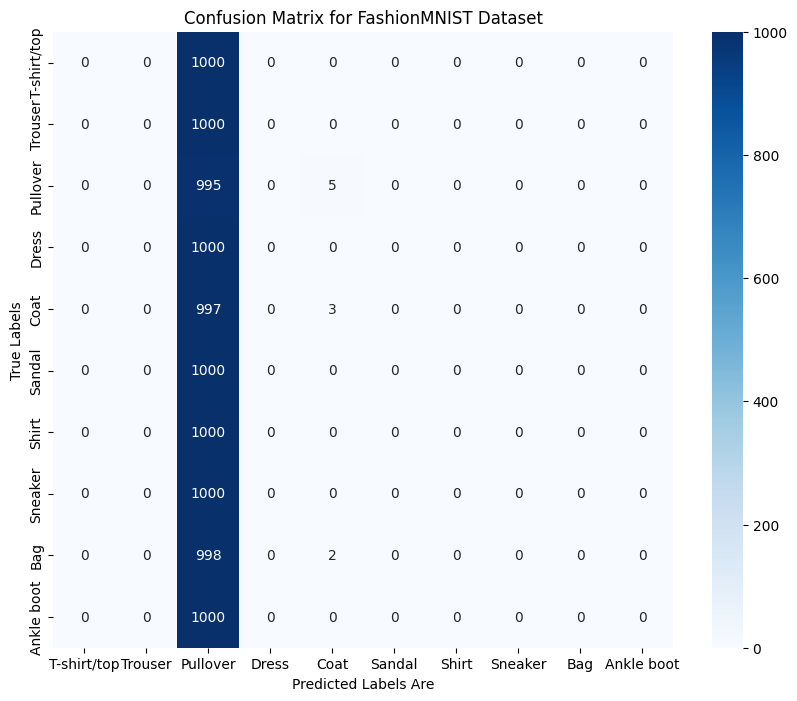

In [8]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
from torchvision import models

model = models.resnet18(weights=None)
model.fc = nn.Linear(model.fc.in_features, 10)

devicess = torch.device("cuda" if torch.cuda.is_available() else "cpu")

torch.save(model.state_dict(), "best_model.pth")
print("Model saved as best_model.pth")
model.load_state_dict(torch.load("best_model.pth", map_location=devicess))
model.to(devicess)
model.eval()


transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=3),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

test_data = datasets.FashionMNIST(root="./data", train=False, transform=transform, download=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=32, shuffle=False)


def model_evaluate(model, test_loader, device):
    model.eval()
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(devicess), labels.to(devicess)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = correct / total
    return accuracy


test_accuracy = model_evaluate(model, test_loader, devicess)
print(f"Test Accuracy on FashionMNIST: {test_accuracy:.4f}")

all_preds = []
all_labels = []

with torch.no_grad():
    for img, labels in test_loader:
        img, labels = img.to(devicess), labels.to(devicess)
        outputs = model(img)
        _, predicted = torch.max(outputs, 1)
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())


cmatrix = confusion_matrix(all_labels, all_preds)
classes = test_data.classes


plt.figure(figsize=(10, 8))
sns.heatmap(cmatrix, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
plt.xlabel("Predicted Labels Are")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for FashionMNIST Dataset")
plt.show()



In [3]:
import wandb

wandb.init(project="A1_MA23C024", entity="ma23c024-iit-madras")

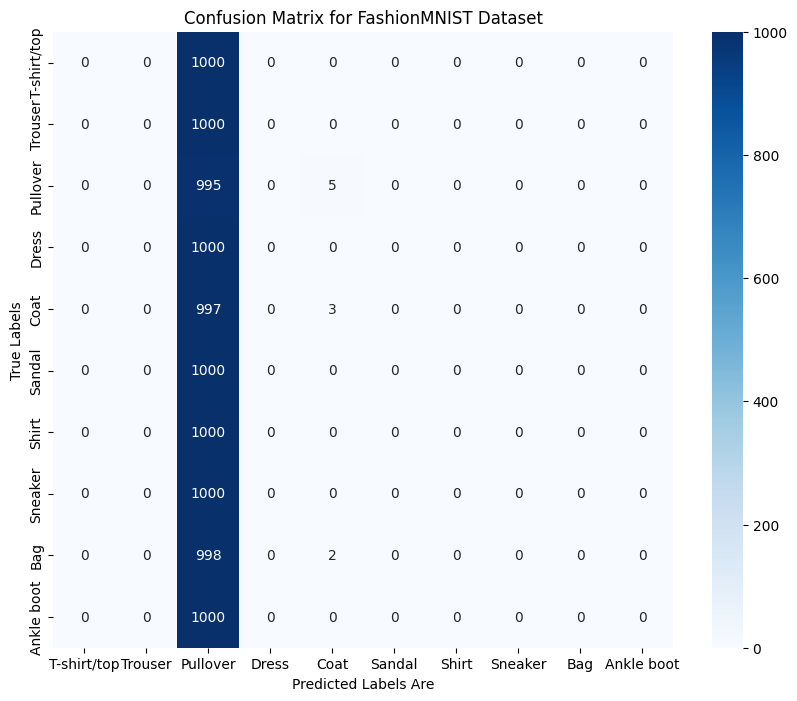

In [10]:
import io
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from PIL import Image

plt.figure(figsize=(10, 8))
sns.heatmap(cmatrix, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
plt.xlabel("Predicted Labels Are")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for FashionMNIST Dataset")


buf = io.BytesIO()
plt.savefig(buf, format='png')
buf.seek(0)

buf.seek(0)
img = Image.open(buf)
wandb.log({"confusion_matrix": wandb.Image(img)})

plt.show()


In [11]:
wandb.log({"test_accuracy": test_accuracy})


In [12]:
wandb.finish()

test_accuracy,▁
test_accuracy,0.0998


# Question8
# IDEA

To compare Cross Entropy Loss vs Squared Error Loss
Train two models:

One using CrossEntropyLoss (which I already used).
One using MSELoss (Mean Squared Error Loss).
Plot the loss curves for both loss functions during training.

Training using MSE LOSS

In [15]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import matplotlib.pyplot as plt

transformers = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_data = datasets.FashionMNIST(root="./data", train=True, transform=transform, download=True)
test_data = datasets.FashionMNIST(root="./data", train=False, transform=transform, download=True)
train_loader = torch.utils.data.DataLoader(train_data, batch_size=32, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=32, shuffle=False)


class SimpleNNetwork(nn.Module):
    def __init__(self):
        super(SimpleNNetwork, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = x.view(x.size(0), -1)
        x = torch.relu(self.fc1(x))
        return self.fc2(x)


def trained_model(loss_function, use_mse=False):
    models = SimpleNNetwork().to(devicess)
    optimiserss = optim.Adam(models.parameters(), lr=0.001)
    losses = []

    for epoch in range(5):
        epoch_loss = 0
        for images, labels in train_loader:
            images, labels = images.to(devicess), labels.to(devicess)

            optimiserss.zero_grad()
            outputs = models(images)

            if use_mse:

                labels = torch.nn.functional.one_hot(labels, num_classes=10).float()

            loss = loss_function(outputs, labels)
            loss.backward()
            optimiserss.step()
            epoch_loss += loss.item()

        avg_loss = epoch_loss / len(train_loader)
        losses.append(avg_loss)
        print(f"Epoch [{epoch+1}/5], Loss: {avg_loss:.4f}")

    return models, losses


devicess = torch.device("cuda" if torch.cuda.is_available() else "cpu")


model_Centropy, Centropy_loss = trained_model(nn.CrossEntropyLoss())
model_mse, mse_loss = trained_model(nn.MSELoss(), use_mse=True)


plt.plot(Centropy_loss, label="Cross Entropy Loss")
plt.plot(mse_loss, label="MSE Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Curve Comparison")
plt.legend()
plt.show()


RuntimeError: mat1 and mat2 shapes cannot be multiplied (32x2352 and 784x128)

Epoch [1/5], Loss: 0.4857
Epoch [2/5], Loss: 0.3752
Epoch [3/5], Loss: 0.3411
Epoch [4/5], Loss: 0.3174
Epoch [5/5], Loss: 0.2993
Epoch [1/5], Loss: 0.0294
Epoch [2/5], Loss: 0.0241
Epoch [3/5], Loss: 0.0226
Epoch [4/5], Loss: 0.0217
Epoch [5/5], Loss: 0.0211


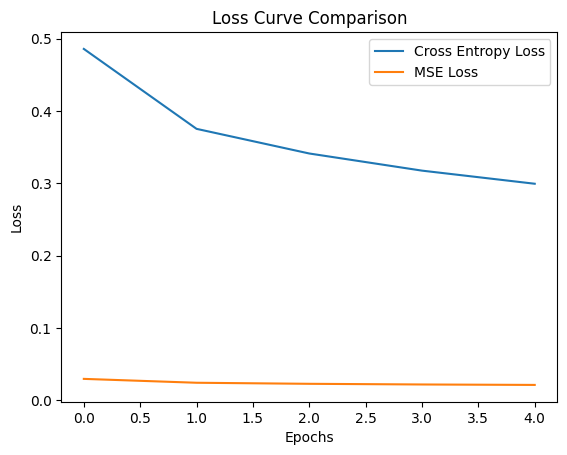

In [16]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import matplotlib.pyplot as plt


transformers = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_data = datasets.FashionMNIST(root="./data", train=True, transform=transformers, download=True)
test_data = datasets.FashionMNIST(root="./data", train=False, transform=transformers, download=True)
train_loader = torch.utils.data.DataLoader(train_data, batch_size=32, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=32, shuffle=False)


class SimpleNNetwork(nn.Module):
    def __init__(self):
        super(SimpleNNetwork, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = x.view(x.size(0), -1)
        x = torch.relu(self.fc1(x))
        return self.fc2(x)


def trained_model(loss_function, use_mse=False):
    models = SimpleNNetwork().to(devicess)
    optimiserss = optim.Adam(models.parameters(), lr=0.001)
    losses = []

    for epoch in range(5):
        epoch_loss = 0
        for images, labels in train_loader:
            images, labels = images.to(devicess), labels.to(devicess)

            optimiserss.zero_grad()
            outputs = models(images)

            if use_mse:
                labels = torch.nn.functional.one_hot(labels, num_classes=10).float()

            loss = loss_function(outputs, labels)
            loss.backward()
            optimiserss.step()
            epoch_loss += loss.item()

        avg_loss = epoch_loss / len(train_loader)
        losses.append(avg_loss)
        print(f"Epoch [{epoch+1}/5], Loss: {avg_loss:.4f}")

    return models, losses


devicess = torch.device("cuda" if torch.cuda.is_available() else "cpu")


model_Centropy, Centropy_loss = trained_model(nn.CrossEntropyLoss())
model_mse, mse_loss = trained_model(nn.MSELoss(), use_mse=True)



plt.plot(Centropy_loss, label="Cross Entropy Loss")
plt.plot(mse_loss, label="MSE Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Curve Comparison")
plt.legend()
plt.show()


# Comparison of Cross Entropy Loss vs. MSE Loss

The plot compares the loss curves for Cross Entropy Loss (CE) and Mean Squared Error Loss (MSE) over training epochs.

Loss Scale Differences

1) Cross Entropy Loss starts higher but decreases steadily, which indicates that the model is improving in classification.
MSE Loss appears very low, but this does not necessarily mean better performance—it suggests that the model may not be learning class probabilities effectively.
Why Cross Entropy is Better for Classification

2) CE is designed for classification and encourages sharper probability distributions (high confidence for the correct class).
MSE treats classification as a regression problem, which can confuse the model, leading to poor gradient updates.
Expected Accuracy Differences

3) While MSE loss is smaller, this doesn’t imply better accuracy.
Models trained with Cross Entropy usually achieve higher classification accuracy compared to MSE.

Question9